# Chapitre 5 : Préparation des données

In [1]:
import pandas as pd

## Pré-requis : chargement des données

In [2]:
# Loading the datasets
iris_df = pd.read_csv("data/iris.csv")
titanic_df = pd.read_csv("data/titanic_train.csv")

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
titanic_df.shape

(891, 12)

## Limiter les données

In [5]:
# Delete one attribute
new_df = iris_df.drop(columns=['sepal_length'])
new_df.head()

,sepal_width,petal_length,petal_width,class
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [6]:
# Keep only some attributes
new_df = iris_df[['petal_length', 'class']]
new_df.head()

,petal_length,class
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa


In [7]:
# Delete passengers where age is < 0
print(titanic_df.shape)
new_df = titanic_df.dropna(axis=0, subset=['Age'])
print(new_df.shape)

(891, 12)
(714, 12)


In [8]:
# Keep only passengers where age is < 21
print(titanic_df.shape)
new_df = titanic_df[titanic_df['Age'] <= 21]
print(new_df.shape)

(891, 12)
(204, 12)


In [9]:
# Only women
print(titanic_df.shape)
new_df = titanic_df[titanic_df['Sex'] == 'female']
print(new_df.shape)

(891, 12)
(314, 12)


In [10]:
# Only women under 21
print(titanic_df.shape)
new_df = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Age'] <= 21)]
print(new_df.shape)

(891, 12)
(84, 12)


## Séparation du dataset train-test

In [11]:
# DO NOT DO THAT 

# Train: first lines, Test: last lines
# Threshold index
TRAIN_RATIO = 0.8
nb_train = int(TRAIN_RATIO * titanic_df.shape[0])

# TRAIN
train_titanic = titanic_df.head(nb_train) 

# TEST
test_titanic = titanic_df.tail(-nb_train) 

print(train_titanic.shape, test_titanic.shape)

(712, 12) (179, 12)


In [12]:
# Better: random sampling
train_titanic = titanic_df.sample(frac=0.8)
test_titanic = titanic_df.drop(train_titanic.index)
print(train_titanic.shape, test_titanic.shape)

(713, 12) (178, 12)


In [13]:
# Even better: random sampling with given seed
train_titanic = titanic_df.sample(frac=0.8, random_state=42)
test_titanic = titanic_df.drop(train_titanic.index)
print(train_titanic.shape, test_titanic.shape)

(713, 12) (178, 12)


In [14]:
# For imbalanced dataset: stratified sampling
train_titanic = titanic_df.groupby('Sex', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
test_titanic = titanic_df.drop(train_titanic.index)
print(train_titanic.shape, test_titanic.shape)

(713, 12) (178, 12)


## Gestion des données manquantes

In [15]:
# Impute missing value => put 'S' if port is missing (Southampton, the most used one)
train_titanic['Embarked'] = train_titanic['Embarked'].fillna('S')

## Préparation des attributs numériques

In [16]:
# Delete outliers on fare for Titanic (mean +/- 3*std)
std = titanic_df['Fare'].std()
mean = titanic_df['Fare'].mean()
limit_low = mean - 3 * std
limit_high = mean + 3 * std
new_df = titanic_df[titanic_df['Fare'].between(limit_low, limit_high)]
print(titanic_df.shape, new_df.shape)

(891, 12) (871, 12)


In [17]:
# Same with z-score (new column : "Fare_zscore")
titanic_df['Fare_zscore'] = (titanic_df['Fare'] - titanic_df['Fare'].mean()) / titanic_df['Fare'].std()
new_df = titanic_df[titanic_df['Fare_zscore'].abs() < 3]
print(titanic_df.shape, new_df.shape)

(891, 13) (871, 13)


In [18]:
titanic_df = titanic_df.drop('Fare_zscore', axis=1)

In [19]:
# Outlier deletion with IQR 
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1
limit_low = q1 - 1.5 * iqr
limit_high = q3 + 1.5 * iqr
new_df = titanic_df[titanic_df['Fare'].between(limit_low, limit_high)]
print(titanic_df.shape, new_df.shape)

(891, 12) (775, 12)


In [20]:
# Feature engineering: compute new attributes (on Iris)
iris_df['petal_area'] = iris_df['petal_length'] * iris_df['petal_width']
iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


In [21]:
# Binarization: even size
titanic_df['Age_bins'] = pd.cut(titanic_df['Age'], bins=5)
titanic_df['Age_bins'].value_counts()

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_bins, dtype: int64

In [22]:
# Binarization: by quantile
titanic_df['Age_quantiles'] = pd.qcut(titanic_df['Age'], q=5)
titanic_df['Age_quantiles'].value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age_quantiles, dtype: int64

In [23]:
# Binarization: manual
titanic_df['Age_manual'] = pd.cut(titanic_df['Age'], bins=[0,13,21,30,50,90], labels=['Child', 'Teen', 'Young', 'Mature', 'Senior'])
titanic_df['Age_manual'].value_counts()

Mature    241
Young     205
Teen      133
Child      71
Senior     64
Name: Age_manual, dtype: int64

In [24]:
# Min/Max scaling
min = iris_df['petal_length'].min()
max = iris_df['petal_length'].max()
iris_df['petal_length_minmax'] = (iris_df['petal_length'] - min) / (max - min)

In [25]:
# Standard scaling
mean = iris_df['petal_length'].mean()
std = iris_df['petal_length'].std()
iris_df['petal_length_standard'] = (iris_df['petal_length'] - mean) / std

In [26]:
# Robust scaling
q1 = iris_df['petal_length'].quantile(0.25)
q3 = iris_df['petal_length'].quantile(0.75)
q2 = iris_df['petal_length'].mean()
iris_df['petal_length_robust'] = (iris_df['petal_length'] - q2) / (q3 - q1)

In [27]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area,sepal_area,petal_length_minmax,petal_length_standard,petal_length_robust
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85,0.067797,-1.336794,-0.673905
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70,0.067797,-1.336794,-0.673905
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04,0.050847,-1.393470,-0.702476
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26,0.084746,-1.280118,-0.645333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00,0.067797,-1.336794,-0.673905


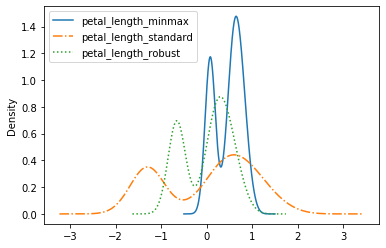

In [28]:
iris_df[['petal_length_minmax','petal_length_standard', 'petal_length_robust']].plot(kind='density', style=['-', '-.', ':'])

In [29]:
# Comparison on Titanic "Fare"

# Min/Max scaling
min = titanic_df['Fare'].min()
max = titanic_df['Fare'].max()
titanic_df['Fare_minmax'] = (titanic_df['Fare'] - min) / (max - min)

# Standard scaling
mean = titanic_df['Fare'].mean()
std = titanic_df['Fare'].std()
titanic_df['Fare_standard'] = (titanic_df['Fare'] - mean) / std

# Robust scaling
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
q2 = titanic_df['Fare'].mean()
titanic_df['Fare_robust'] = (titanic_df['Fare'] - q2) / (q3 - q1)

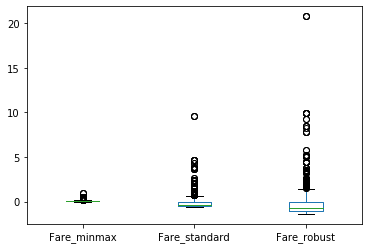

In [30]:
titanic_df[['Fare_minmax', 'Fare_standard', 'Fare_robust']].plot(kind='box')

## Préparation des données catégorielles

In [31]:
# Category list
iris_df['class'] = iris_df['class'].astype('category')
iris_df['class'].cat.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [32]:
# Count elements by category
iris_df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [33]:
# Ordering categories: before
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Pclass'].cat.ordered

False

In [34]:
# Ordering categories
titanic_df['Pclass'].cat.reorder_categories([1, 2, 3], ordered=True, inplace=True)
titanic_df['Pclass'].cat.ordered

True

In [35]:
# Creating a title attribute
titanic_df['title'] = titanic_df['Name'].str.split('[,|.]').str[1].str.strip()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Age_quantiles,Age_manual,Fare_minmax,Fare_standard,Fare_robust,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]","(19.0, 25.0]",Young,0.014151,-0.502163,-1.080755,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.139136,0.786404,1.692498,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]","(25.0, 31.8]",Young,0.015469,-0.488580,-1.051521,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.103644,0.420494,0.904987,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.015713,-0.486064,-1.046108,Mr


In [36]:
# Analyzing titles in Titanic
titanic_df['title'] = titanic_df['title'].astype('category')
titanic_df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
Name: title, dtype: int64

In [37]:
# Merging english and french meanings
titanic_df['title'].replace('Mlle', 'Miss', inplace=True)
titanic_df['title'].replace('Mme', 'Mrs', inplace=True)
titanic_df['title'].value_counts()

Mr              517
Miss            184
Mrs             126
Master           40
Dr                7
Rev               6
Major             2
Col               2
the Countess      1
Sir               1
Ms                1
Lady              1
Jonkheer          1
Don               1
Capt              1
Name: title, dtype: int64

In [38]:
# Removing unused categories
titanic_df['title'].cat.remove_unused_categories(inplace=True)
titanic_df['title'].cat.categories

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')

In [39]:
# Merging categories with few passengers
nb_values = titanic_df['title'].value_counts()
to_replace = nb_values[nb_values < 20].index
titanic_df['title'] = titanic_df['title'].replace({x:'Other' for x in to_replace}).astype('category')
titanic_df['title'].value_counts()

Mr        517
Miss      184
Mrs       126
Master     40
Other      24
Name: title, dtype: int64

In [40]:
# Title dummification
title_df = pd.get_dummies(titanic_df['title'], prefix='t')
new_df = pd.concat([titanic_df, title_df], axis=1)
new_df.drop(columns='title', inplace=True)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_quantiles,Age_manual,Fare_minmax,Fare_standard,Fare_robust,t_Master,t_Miss,t_Mr,t_Mrs,t_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(19.0, 25.0]",Young,0.014151,-0.502163,-1.080755,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(31.8, 41.0]",Mature,0.139136,0.786404,1.692498,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(25.0, 31.8]",Young,0.015469,-0.488580,-1.051521,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(31.8, 41.0]",Mature,0.103644,0.420494,0.904987,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(31.8, 41.0]",Mature,0.015713,-0.486064,-1.046108,0,0,1,0,0


In [41]:
# Gender dummification
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
sex_df = pd.get_dummies(titanic_df['Sex'], prefix='Sex', drop_first=True)
new_df = pd.concat([titanic_df, sex_df], axis=1)
new_df.drop(columns='Sex', inplace=True)
new_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Age_quantiles,Age_manual,Fare_minmax,Fare_standard,Fare_robust,title,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]","(19.0, 25.0]",Young,0.014151,-0.502163,-1.080755,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.139136,0.786404,1.692498,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]","(25.0, 31.8]",Young,0.015469,-0.488580,-1.051521,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.103644,0.420494,0.904987,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]","(31.8, 41.0]",Mature,0.015713,-0.486064,-1.046108,Mr,1


## Données particulières : dates

In [42]:
# Accident dataset loading
acc_df = pd.read_csv('data/acc-2018.csv', sep=';')
acc_df.head()

,Num_Acc,an,mois,jour,hrmn,lat,long,dep
0,201800000001,18,1,24,1505,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,5051607.0,290605.0,590


In [43]:
# Create a date attribute from an/mois/jour
acc_df['date'] = acc_df['jour'].astype('str') + '-' + acc_df['mois'].astype('str') + '-' + acc_df['an'].astype('str')
acc_df['date'] = pd.to_datetime(acc_df['date'], dayfirst=True)
acc_df.head()

,Num_Acc,an,mois,jour,hrmn,lat,long,dep,date
0,201800000001,18,1,24,1505,5055737.0,294992.0,590,2018-01-24
1,201800000002,18,2,12,1015,5052936.0,293151.0,590,2018-02-12
2,201800000003,18,3,4,1135,5051243.0,291714.0,590,2018-03-04
3,201800000004,18,5,5,1735,5051974.0,289123.0,590,2018-05-05
4,201800000005,18,6,26,1605,5051607.0,290605.0,590,2018-06-26


In [44]:
# Create a datetime attribute
acc_df['heure'] = acc_df['hrmn'] // 100 # division entière
acc_df['min'] = acc_df['hrmn'] % 100 # reste de la division

acc_df['datetime'] = acc_df['jour'].astype('str') + '-' + acc_df['mois'].astype('str') + '-' + acc_df['an'].astype('str')
acc_df['datetime'] += '-' + acc_df['heure'].astype('str') + ':' + acc_df['min'].astype('str')

acc_df['datetime'] = pd.to_datetime(acc_df['datetime'], dayfirst=True)
acc_df.head()

,Num_Acc,an,mois,jour,hrmn,lat,long,dep,date,heure,min,datetime
0,201800000001,18,1,24,1505,5055737.0,294992.0,590,2018-01-24,15,5,2018-01-24 15:05:00
1,201800000002,18,2,12,1015,5052936.0,293151.0,590,2018-02-12,10,15,2018-02-12 10:15:00
2,201800000003,18,3,4,1135,5051243.0,291714.0,590,2018-03-04,11,35,2018-03-04 11:35:00
3,201800000004,18,5,5,1735,5051974.0,289123.0,590,2018-05-05,17,35,2018-05-05 17:35:00
4,201800000005,18,6,26,1605,5051607.0,290605.0,590,2018-06-26,16,5,2018-06-26 16:05:00


In [45]:
# Creating date from automatic recognition of features
acc_df.rename(columns={'an':'year', 'mois':'month', 'jour':'day'}, inplace=True)
acc_df['year'] = 2000 + acc_df['year']
acc_df['date2'] = pd.to_datetime(acc_df[['year', 'month', 'day']], errors='coerce')
acc_df.head()

,Num_Acc,year,month,day,hrmn,lat,long,dep,date,heure,min,datetime,date2
0,201800000001,2018,1,24,1505,5055737.0,294992.0,590,2018-01-24,15,5,2018-01-24 15:05:00,2018-01-24
1,201800000002,2018,2,12,1015,5052936.0,293151.0,590,2018-02-12,10,15,2018-02-12 10:15:00,2018-02-12
2,201800000003,2018,3,4,1135,5051243.0,291714.0,590,2018-03-04,11,35,2018-03-04 11:35:00,2018-03-04
3,201800000004,2018,5,5,1735,5051974.0,289123.0,590,2018-05-05,17,35,2018-05-05 17:35:00,2018-05-05
4,201800000005,2018,6,26,1605,5051607.0,290605.0,590,2018-06-26,16,5,2018-06-26 16:05:00,2018-06-26


In [46]:
# Extract date components
acc_df['jour_an'] = acc_df['date'].dt.dayofyear
acc_df['jour_semaine'] = acc_df['date'].dt.dayofweek
acc_df['trimestre'] = acc_df['date'].dt.quarter
acc_df['semaine'] = acc_df['date'].dt.week
acc_df.head()

,Num_Acc,year,month,day,hrmn,lat,long,dep,date,heure,min,datetime,date2,jour_an,jour_semaine,trimestre,semaine
0,201800000001,2018,1,24,1505,5055737.0,294992.0,590,2018-01-24,15,5,2018-01-24 15:05:00,2018-01-24,24,2,1,4
1,201800000002,2018,2,12,1015,5052936.0,293151.0,590,2018-02-12,10,15,2018-02-12 10:15:00,2018-02-12,43,0,1,7
2,201800000003,2018,3,4,1135,5051243.0,291714.0,590,2018-03-04,11,35,2018-03-04 11:35:00,2018-03-04,63,6,1,9
3,201800000004,2018,5,5,1735,5051974.0,289123.0,590,2018-05-05,17,35,2018-05-05 17:35:00,2018-05-05,125,5,2,18
4,201800000005,2018,6,26,1605,5051607.0,290605.0,590,2018-06-26,16,5,2018-06-26 16:05:00,2018-06-26,177,1,2,26


In [47]:
# Compute with dates
acc_df['datetime'] - pd.Timedelta(days=1) # 1 day before

0       2018-01-23 15:05:00
1       2018-02-11 10:15:00
2       2018-03-03 11:35:00
3       2018-05-04 17:35:00
4       2018-06-25 16:05:00
                ...        
57778   2018-12-14 10:50:00
57779   2018-12-15 06:10:00
57780   2018-12-21 21:50:00
57781   2018-12-22 19:45:00
57782   2018-12-27 14:25:00
Name: datetime, Length: 57783, dtype: datetime64[ns]

In [48]:
# Adding 5 work days and computing real days nb
acc_df['lim_constat'] = acc_df['datetime'] + 5 * pd.offsets.BDay()
acc_df['duree_reelle'] = acc_df['lim_constat'] - acc_df['datetime']
acc_df.head()

,Num_Acc,year,month,day,hrmn,lat,long,dep,date,heure,min,datetime,date2,jour_an,jour_semaine,trimestre,semaine,lim_constat,duree_reelle
0,201800000001,2018,1,24,1505,5055737.0,294992.0,590,2018-01-24,15,5,2018-01-24 15:05:00,2018-01-24,24,2,1,4,2018-01-31 15:05:00,7 days
1,201800000002,2018,2,12,1015,5052936.0,293151.0,590,2018-02-12,10,15,2018-02-12 10:15:00,2018-02-12,43,0,1,7,2018-02-19 10:15:00,7 days
2,201800000003,2018,3,4,1135,5051243.0,291714.0,590,2018-03-04,11,35,2018-03-04 11:35:00,2018-03-04,63,6,1,9,2018-03-09 11:35:00,5 days
3,201800000004,2018,5,5,1735,5051974.0,289123.0,590,2018-05-05,17,35,2018-05-05 17:35:00,2018-05-05,125,5,2,18,2018-05-11 17:35:00,6 days
4,201800000005,2018,6,26,1605,5051607.0,290605.0,590,2018-06-26,16,5,2018-06-26 16:05:00,2018-06-26,177,1,2,26,2018-07-03 16:05:00,7 days


## Données particulières : textes

In [49]:
# Attribute to lower case
titanic_df = pd.read_csv("data/titanic_train.csv") # New loading
titanic_df['Name_lower'] = titanic_df['Name'].str.lower()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"braund, mr. owen harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"cumings, mrs. john bradley (florence briggs th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"heikkinen, miss. laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"futrelle, mrs. jacques heath (lily may peel)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"allen, mr. william henry"


In [50]:
# Removing commas
titanic_df['Name_lower'] = titanic_df['Name_lower'].str.replace(',', '')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry


In [51]:
# Same in one line (lower + removing commas)
titanic_df['Name_lower'] = titanic_df['Name'].str.lower().str.replace(',', '')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry


In [52]:
# Is the person a Mr?
titanic_df['isMr'] = titanic_df['Name'].str.contains('Mr.', regex=False)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower,isMr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel),False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry,True


In [53]:
# Extract deck from cabin number
titanic_df['deck'] = titanic_df['Cabin'].str.slice(stop=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower,isMr,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris,True,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina,False,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel),False,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry,True,NaN


In [54]:
%%time
# Extract title
titanic_df['title'] = titanic_df['Name'].str.split('[,|.]').str[1].str.strip()
titanic_df.head()

CPU times: user 4.62 ms, sys: 25 µs, total: 4.65 ms
Wall time: 4.24 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower,isMr,deck,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris,True,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...,False,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina,False,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel),False,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry,True,NaN,Mr


In [55]:
%%time
# Same with apply
def get_title(passenger):
    name = passenger['Name']
    title = name.split(',')[1].split('.')[0].strip()
    return title
titanic_df['title'] = titanic_df.apply(get_title, axis=1)
titanic_df.head()

CPU times: user 14.6 ms, sys: 105 µs, total: 14.7 ms
Wall time: 14.6 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_lower,isMr,deck,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr. owen harris,True,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs. john bradley (florence briggs tha...,False,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss. laina,False,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs. jacques heath (lily may peel),False,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr. william henry,True,NaN,Mr


## Pipelines avec scikit-learn

In [56]:
# Transformer example (DO NOT USE IN REAL USE CASES)

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class CustomMinMax(BaseEstimator, TransformerMixin):
    # Constructeur: initialisation des attribus
    def __init__(self):
        self.min_val = np.NaN
        self.max_val = np.NaN
    
    # Fit: calcul min/max
    def fit(self, X, y=None):
        self.min_val = X.min()
        self.max_val = X.max()
        return self 
    
    # Transform: application de la normalisation
    def transform(self, X, y=None):
        X_scaled = (X - self.min_val) / (self.max_val - self.min_val)
        return X_scaled

In [57]:
# New loading + split train/test
titanic_df = pd.read_csv("data/titanic_train.csv")
train = titanic_df[:500]
test = titanic_df[500:]

In [58]:
# Create pipeline with normalization
pipeline = Pipeline([('scaler', CustomMinMax())])

In [59]:
# Compute parameters
pipeline.fit(train[{'Age', 'Fare'}])

Pipeline(memory=None, steps=[('scaler', CustomMinMax())], verbose=False)

In [60]:
# Apply pipeline
norm = pipeline.transform(test[{'Age', 'Fare'}])

In [61]:
# Pipeline with many steps
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline([('minmaxscaler', MinMaxScaler()),
                             ('imputer', SimpleImputer(strategy='mean')),
                             ('discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'))])
numeric_pipeline.fit(train[{'Age', 'Fare'}])
new_df = numeric_pipeline.transform(test[{'Age', 'Fare'}])

In [62]:
# Pipeline parameters
print(numeric_pipeline.steps[0][1].data_min_, numeric_pipeline.steps[0][1].data_max_)

[0.75 0.  ] [ 71.     512.3292]
